In [1]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Initialize simulator
sim = AerSimulator()

# Create a 2-qubit circuit
qc = QuantumCircuit(2, 2)

# --- Apply multi-qubit gates ---
qc.h(0)        # Hadamard on qubit 0
qc.cx(0, 1)    # CNOT with control 0 and target 1
qc.cz(0, 1)    # Controlled-Z
qc.swap(0, 1)  # Swap qubit 0 and 1

# Measure all qubits
qc.measure_all()

# Display circuit
print("Quantum Circuit:")
print(qc.draw())

# Run simulation
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()

# Display results
counts = result.get_counts()
print("\nMeasurement Counts:", counts)


Quantum Circuit:
        ┌───┐            ░ ┌─┐   
   q_0: ┤ H ├──■───■──X──░─┤M├───
        └───┘┌─┴─┐ │  │  ░ └╥┘┌─┐
   q_1: ─────┤ X ├─■──X──░──╫─┤M├
             └───┘       ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 

Measurement Counts: {'00 00': 540, '11 00': 484}


In [3]:
print("Name : Srikanth Babu S N ")
print("Regno : 22MIS0067")

Name : Srikanth Babu S N 
Regno : 22MIS0067


Task 1 : Control/Target Variation

Counts (control 0 → target 1): {'11': 500, '00': 524}


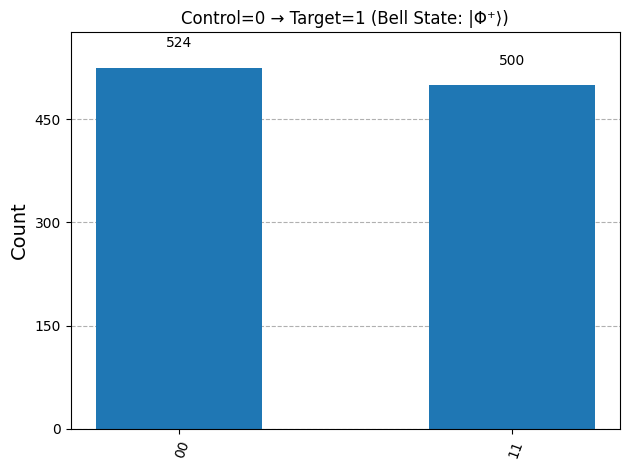

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

qc_A = QuantumCircuit(2, 2)
qc_A.h(0)
qc_A.cx(0, 1)
qc_A.measure([0, 1], [0, 1])

tqc_A = transpile(qc_A, sim)
result_A = sim.run(tqc_A, shots=1024).result()
counts_A = result_A.get_counts()

print("Counts (control 0 → target 1):", counts_A)
plot_histogram(counts_A, title="Control=0 → Target=1 (Bell State: |Φ⁺⟩)")

Counts: {'01': 507, '00': 517}


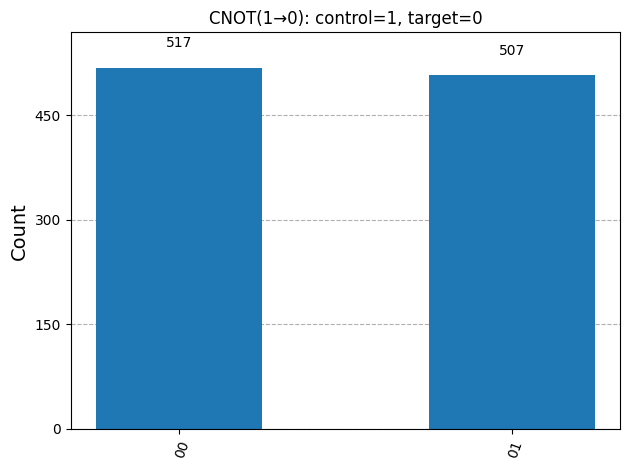

In [9]:
qc2 = QuantumCircuit(2, 2)
qc2.h(0)
qc2.cx(1, 0)
qc2.measure([0, 1], [0, 1])

result2 = sim.run(transpile(qc2, sim), shots=1024).result()
counts2 = result2.get_counts()

print("Counts:", counts2)
plot_histogram(counts2, title="CNOT(1→0): control=1, target=0")

Counts: {'01': 557, '00': 467}


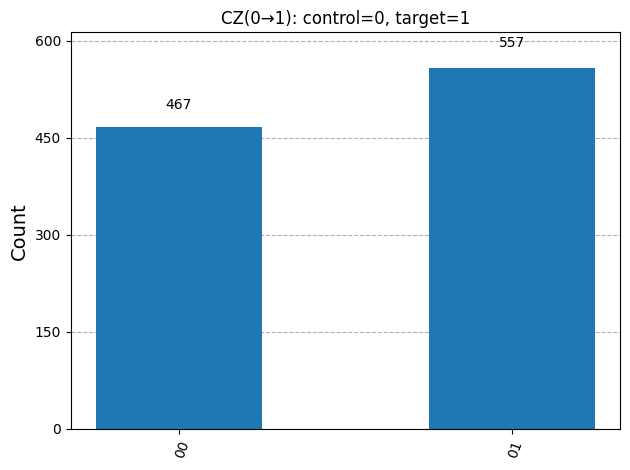

In [10]:
qc3 = QuantumCircuit(2, 2)
qc3.h(0)
qc3.cz(0, 1)
qc3.measure([0, 1], [0, 1])

result3 = sim.run(transpile(qc3, sim), shots=1024).result()
counts3 = result3.get_counts()

print("Counts:", counts3)
plot_histogram(counts3, title="CZ(0→1): control=0, target=1")

Task 2: Gate Removal

With CNOT: {'00': 514, '11': 510}
Without CNOT: {'01': 506, '00': 518}


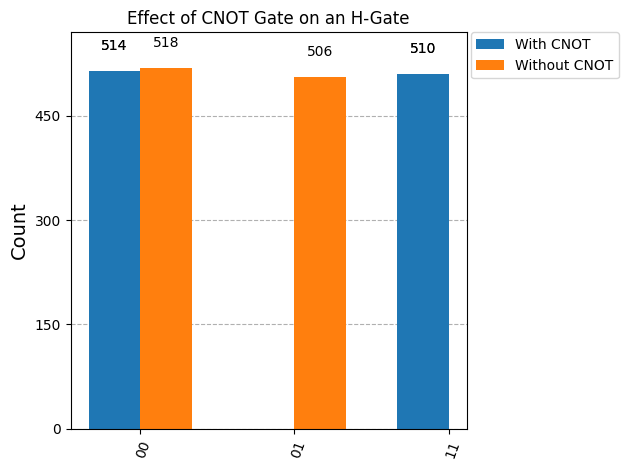

In [11]:
qc_orig = QuantumCircuit(2, 2)
qc_orig.h(0)
qc_orig.cx(0, 1)
qc_orig.measure([0, 1], [0, 1])
result_orig = sim.run(transpile(qc_orig, sim), shots=1024).result()
counts_orig = result_orig.get_counts()

qc_removed = QuantumCircuit(2, 2)
qc_removed.h(0)
qc_removed.measure([0, 1], [0, 1])
result_removed = sim.run(transpile(qc_removed, sim), shots=1024).result()
counts_removed = result_removed.get_counts()

print("With CNOT:", counts_orig)
print("Without CNOT:", counts_removed)

plot_histogram([counts_orig, counts_removed], legend=["With CNOT", "Without CNOT"], title="Effect of CNOT Gate on an H-Gate")

Task 3: Add Another Hadamard

Counts (H on both qubits): {'01': 220, '00': 262, '10': 284, '11': 258}


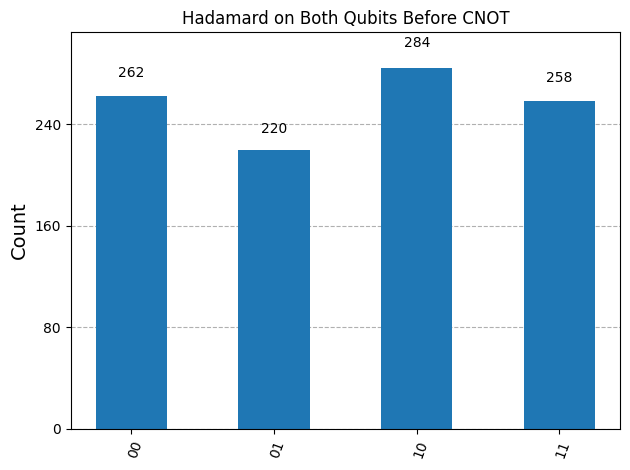

In [13]:
qc_h2 = QuantumCircuit(2, 2)
qc_h2.h(0)
qc_h2.h(1)
qc_h2.cx(0, 1)
qc_h2.measure([0, 1], [0, 1])

tqc_h2 = transpile(qc_h2, sim)
result_h2 = sim.run(tqc_h2, shots=1024).result()
counts_h2 = result_h2.get_counts()

print("Counts (H on both qubits):", counts_h2)
plot_histogram(counts_h2, title="Hadamard on Both Qubits Before CNOT")